<a href="https://colab.research.google.com/github/kv1792/MachineLearning/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [29]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

# Before using Y for feature scaling, the standardization method of feature scaling expects the feature to be
# in 2D array format. Hence, we need to transform Y to that format.

In [30]:
Y = Y.reshape(len(Y),1)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
Y = sc_y.fit_transform(Y) 

# Here, due to absence of coefficients in SVR method, we need feature scaling to bring the dependent and 
# independent variables on level terms to help the model find the correlation between them.
# This is because the values of X (1,2,3,4....10) and Y (45000, 60000...1000000) were totally different in terms
# of their valuation.
# Also here, the Y needs scaling too because unlike last example where the values of Y were only the possible two values
# Hence, they were just encoded to boolean values (1 and 0). But in this case, there are different values, hence,
# the scaling is needed for both X and Y (sc_x and sc_y)

In [19]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [20]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [32]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')

regressor.fit(X, Y)

# Here, to train the SVR regression model, we need to specify the type of kernel to be used for training the model
# If the data is non linear, then the kernels can be many types and Radial Bias Function (rbf) is one of them.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [33]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

# Here, we are first predicting the salary of the position 6.5
# For that, we need to first transform the value 6.5 to the feature X scale i.e. sc_x. We don't want to create
# new scaler value of X, we want to use the created one i.e. sc_x, hence we use only transform() method.
# For creating new feature scale, we use fit_transform() method.
# Now once the value is transformed to feature scale of sc_x range, the value is then fed to predict() method
# of the regressor.
# The predicted value outcome will be in the scale of Y.
# Hence, to transform it back to the appropriate value of Salary, we need inverse transform it back to 
# Salary range of Y. So, we use inverse_transform() method of Y feature scale i.e. sc_y

array([170370.0204065])

## Visualising the SVR results

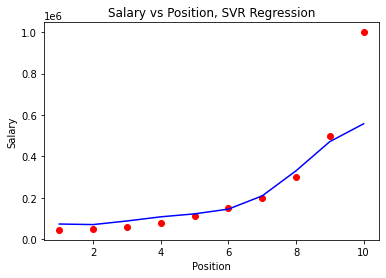

In [37]:
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(Y), color='red')
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color='blue')
plt.title('Salary vs Position, SVR Regression')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

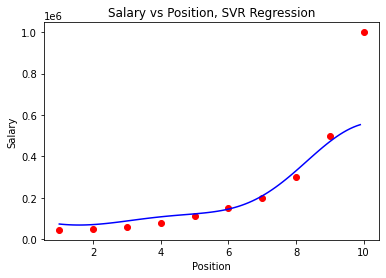

In [45]:
X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(Y), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid))), color='blue')
plt.title('Salary vs Position, SVR Regression')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [46]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[15]])))

array([268587.03686082])